**Chapter2 Supervised Learning**

**2.3.5 Decision Tree**

In [4]:
!pip install graphviz

In [5]:
import mglearn
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt

결정트리는, 데이터를 분할하는 것을 각 분할된 영역이(결정 트리의 리프) 한 개의 타깃값(하나의 클래스나 하나의 회귀 분석 결과)을 가질 때까지 반복된다. 


타깃 하나로만 이뤄진 리프 노드를 pure node라고 한다.

새로운 데이터 포인트에 대한 예측은 주어진 데이터 포인트가  특성을 분할한 영역들 중 어디에 놓이는지를 확인하면 된다. 그래서 그 영역의 타깃값 중 다수인 것을 예측 결과로 한다. 루트 노드에서 시작해 테스트의 결과에 따라 왼쪽 또는 오른쪽으로 트리를 탐색해나가는 식으로 영역을 찾을 수 있다.

같은 방법으로 회귀문제에서도 트리를 사용할 수 있다. 예측을 하려면 각 노드의 테스트 결과에 따라 트리를 탐색해나가고 새로운 데이터 포인트에 해당되는 리프 노드를 찾는다. 찾은 리프 노드의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.

**결정 트리의 복잡도 제어**

일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고, 훈련 데이터에 overfitting된다. 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미이다.

과적합을 막는 전략은 다음과 같이 크게 2가지다.
1. 트리 생성을 일찍 중단하는 전략(사전 가지치기 pre-pruning)
1. 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략(post-pruning, pruning)

사전 가지치기의 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최대 개수를 지정하는 것.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Train Set Accuracy: {}".format(tree.score(X_train, y_train)))
print("Test Set Accuracy: {}".format(tree.score(X_test, y_test)))


Train Set Accuracy: 1.0
Test Set Accuracy: 0.9370629370629371


위의 경우는 기본값 설정으로, 완전한 트리(모든 리프 노드가 순수 노드가 될 때까지 생성한 트리)모델을 만든 것.
곧, 훈련 세트의 정확도가 100%인 것. 과적합 방지를 위해 아래와 같이 연속된 질문을 최대 4개로 제한. 

In [12]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Train Set Accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Accuracy: {: .3f}".format(tree.score(X_test, y_test)))

Train Set Accuracy: 0.988
Test Set Accuracy:  0.951


In [20]:
# Feature Importance
print("Feature Importance: \n{}".format(tree.feature_importances_))

Feature Importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


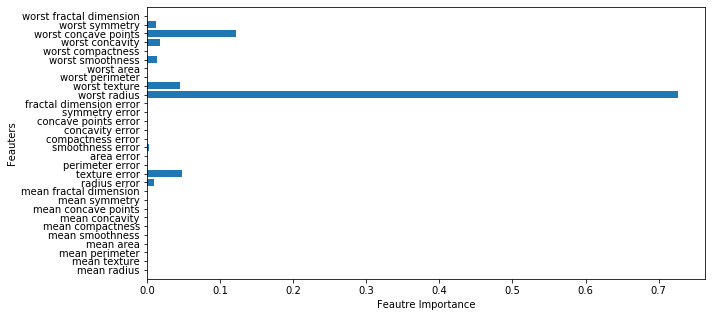

In [27]:
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10, 5))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feautre Importance")
    plt.ylabel("Feauters")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

**장단점**

1. 만들어진 모델을 쉽게 시각화 할 수 있다. 
1. **데이터 스케일**에 구애받지 않는다.
1. 각 특성이 개별적으로 처리되어 데이터를 분할하는데, 데이터 스케일에 영향을 받지 않으므로, 결정 트리에서는 특성의 정규화나 표준화와 같은 전처리 과정이 필요없다. 
1. 특히, 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있더라도 잘 작동한다.
1. 주요 단점은, 사전 가지치기를 사용함에도 불구하고 과적합경향이 있어, 일반화 성능이 좋지 못한 것. 
1. 따라서, 앙상블 방법이 단일 결정 트리의 대안으로 흔히 사용된다.